# Lab 4: Support Vector Machines, Neural Networks and Convolutional Neural Networks

Using 13D Wine Dataset

In [1]:
from platform import python_version

print(python_version())

3.7.7


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import tensorflow as tf

# Load Data

In [3]:
wineData = np.load('wineData.npy')
wineLabels = np.load('wineLabels.npy')


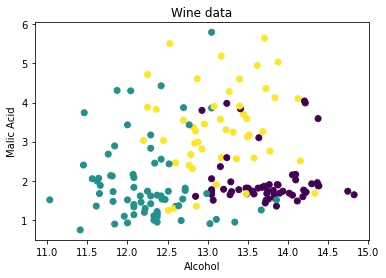

In [4]:

plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()


Split data into testing and training 80-20 split

In [5]:
#wineData, wineLabels = shuffle(wineData, wineLabels, random_state=0) #make sure the samples are not ordered
xTrn, xTst, yTrn, yTst = train_test_split(wineData, wineLabels, test_size=0.2)

In [6]:
print(xTst)

[[1.225e+01 3.880e+00 2.200e+00 1.850e+01 1.120e+02 1.380e+00 7.800e-01
  2.900e-01 1.140e+00 8.210e+00 6.500e-01 2.000e+00 8.550e+02]
 [1.277e+01 3.430e+00 1.980e+00 1.600e+01 8.000e+01 1.630e+00 1.250e+00
  4.300e-01 8.300e-01 3.400e+00 7.000e-01 2.120e+00 3.720e+02]
 [1.270e+01 3.870e+00 2.400e+00 2.300e+01 1.010e+02 2.830e+00 2.550e+00
  4.300e-01 1.950e+00 2.570e+00 1.190e+00 3.130e+00 4.630e+02]
 [1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
  1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
 [1.222e+01 1.290e+00 1.940e+00 1.900e+01 9.200e+01 2.360e+00 2.040e+00
  3.900e-01 2.080e+00 2.700e+00 8.600e-01 3.020e+00 3.120e+02]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.378e+01 2.760e+00 2.300e+00 2.200e+01 9.000e+01 1.350e+00 6.800e-01
  4.100e-01 1.030e+00 9.580e+00 7.000e-01 1.680e+00 6.150e+02]
 [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.4

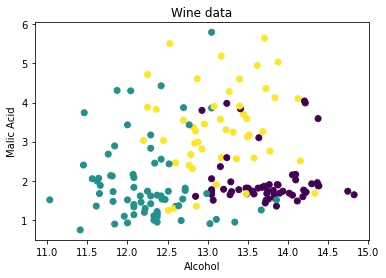

In [7]:
plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)

# Add title and axis names
plt.title('Wine data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

# Plot showing test/train split

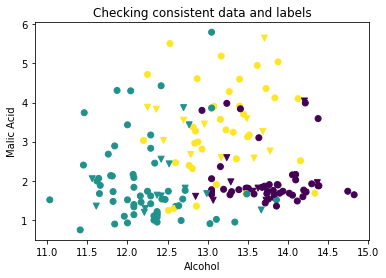

In [8]:
plt.figure()

plt.scatter(xTrn[:,0], xTrn[:,1], c=yTrn, marker="o")
plt.scatter(xTst[:,0], xTst[:,1], c=yTst, marker='v')
# Add title and axis names
plt.title('Checking consistent data and labels')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


plt.show()

# Task 4.1 - Multiclass SVM for Wine Data

### Use standardScalr to standardise the class

In [9]:
normaliser = StandardScaler()
XTrn = normaliser.fit_transform(xTrn)
XTst = normaliser.transform(xTst)

In [10]:
print(XTrn)

[[-1.41701927e+00 -1.60031623e-01  1.40712663e+00 ... -7.62123731e-02
  -5.01616782e-01 -3.83945166e-01]
 [-5.79861973e-01 -5.04074763e-01 -1.40400084e+00 ...  3.17161669e-01
   1.35457486e+00 -2.35276679e-01]
 [-8.90806114e-01 -5.04074763e-01 -8.86161569e-01 ...  1.42328761e-01
   7.87798785e-01 -7.47708485e-01]
 ...
 [ 6.59450872e-02  1.37493008e+00 -1.46391182e-01 ... -5.57002869e-01
  -8.55851828e-01 -7.31892689e-01]
 [ 8.55264828e-01 -3.89393716e-01  1.56289518e-03 ...  6.23119257e-01
   1.96385914e+00  9.12950145e-01]
 [ 1.13033080e+00 -5.04074763e-01 -3.31333779e-01 ...  6.66827484e-01
   6.88612972e-01  1.62466099e+00]]


In [11]:
print(XTst)

[[-8.90806114e-01  1.39257332e+00 -5.90253414e-01 -2.33437944e-01
   9.69573381e-01 -1.48288025e+00 -1.28850891e+00 -5.86589661e-01
  -7.93755811e-01  1.40938511e+00 -1.38745918e+00 -8.70021230e-01
   3.43581472e-01]
 [-2.68917833e-01  9.95600462e-01 -1.40400084e+00 -9.97221077e-01
  -1.34072627e+00 -1.07656465e+00 -8.04792603e-01  5.45585335e-01
  -1.32769730e+00 -6.85173552e-01 -1.16891805e+00 -6.99988408e-01
  -1.18422447e+00]
 [-3.52633563e-01  1.38375170e+00  1.49516973e-01  1.14137170e+00
   1.75407874e-01  8.73750217e-01  5.33146108e-01  5.45585335e-01
   6.01381618e-01 -1.04660467e+00  9.72785072e-01  7.31121178e-01
  -8.96376972e-01]
 [-9.38643674e-01 -9.80442187e-01 -2.25473678e+00 -7.52810475e-01
   3.78525108e+00 -7.19006925e-01 -7.73917094e-01 -1.79963430e+00
   1.54869716e+00 -9.24676101e-01  1.36615911e+00  6.46104767e-01
  -8.97713518e-02]
 [-9.26684284e-01 -8.92225997e-01 -1.55195492e+00 -8.06813169e-02
  -4.74363904e-01  1.09876894e-01  8.26246008e-03  2.22106765e-01


In [12]:
print(xTst)
print(XTst)

[[1.225e+01 3.880e+00 2.200e+00 1.850e+01 1.120e+02 1.380e+00 7.800e-01
  2.900e-01 1.140e+00 8.210e+00 6.500e-01 2.000e+00 8.550e+02]
 [1.277e+01 3.430e+00 1.980e+00 1.600e+01 8.000e+01 1.630e+00 1.250e+00
  4.300e-01 8.300e-01 3.400e+00 7.000e-01 2.120e+00 3.720e+02]
 [1.270e+01 3.870e+00 2.400e+00 2.300e+01 1.010e+02 2.830e+00 2.550e+00
  4.300e-01 1.950e+00 2.570e+00 1.190e+00 3.130e+00 4.630e+02]
 [1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
  1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
 [1.222e+01 1.290e+00 1.940e+00 1.900e+01 9.200e+01 2.360e+00 2.040e+00
  3.900e-01 2.080e+00 2.700e+00 8.600e-01 3.020e+00 3.120e+02]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.378e+01 2.760e+00 2.300e+00 2.200e+01 9.000e+01 1.350e+00 6.800e-01
  4.100e-01 1.030e+00 9.580e+00 7.000e-01 1.680e+00 6.150e+02]
 [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.4

### create and train a multiclass svm

In [13]:
svc = SVC(C = 2.0, kernel='sigmoid')
svc.fit(XTrn, yTrn)

SVC(C=2.0, kernel='sigmoid')

### Predict test data and find accuracy

In [14]:
print(XTst.shape)
print(yTst.shape)
print(XTst)
print(XTrn)

(36, 13)
(36,)
[[-8.90806114e-01  1.39257332e+00 -5.90253414e-01 -2.33437944e-01
   9.69573381e-01 -1.48288025e+00 -1.28850891e+00 -5.86589661e-01
  -7.93755811e-01  1.40938511e+00 -1.38745918e+00 -8.70021230e-01
   3.43581472e-01]
 [-2.68917833e-01  9.95600462e-01 -1.40400084e+00 -9.97221077e-01
  -1.34072627e+00 -1.07656465e+00 -8.04792603e-01  5.45585335e-01
  -1.32769730e+00 -6.85173552e-01 -1.16891805e+00 -6.99988408e-01
  -1.18422447e+00]
 [-3.52633563e-01  1.38375170e+00  1.49516973e-01  1.14137170e+00
   1.75407874e-01  8.73750217e-01  5.33146108e-01  5.45585335e-01
   6.01381618e-01 -1.04660467e+00  9.72785072e-01  7.31121178e-01
  -8.96376972e-01]
 [-9.38643674e-01 -9.80442187e-01 -2.25473678e+00 -7.52810475e-01
   3.78525108e+00 -7.19006925e-01 -7.73917094e-01 -1.79963430e+00
   1.54869716e+00 -9.24676101e-01  1.36615911e+00  6.46104767e-01
  -8.97713518e-02]
 [-9.26684284e-01 -8.92225997e-01 -1.55195492e+00 -8.06813169e-02
  -4.74363904e-01  1.09876894e-01  8.26246008e-03  

In [70]:
svc.predict(XTst)
svc.score(XTst, yTst)

0.9444444444444444

### Visualise test data in scatter plot, colour the ground truth values and draw a scatter plot to visualise test data with predicted class values coloured

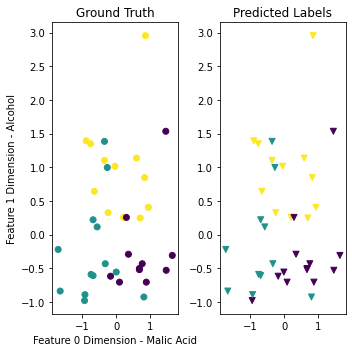

In [74]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))

axes[0].set_title('Ground Truth')
axes[0].set_ylabel('Feature 1 Dimension - Alcohol')
axes[0].set_xlabel('Feature 0 Dimension - Malic Acid')

axes[1].set_title('Predicted Labels')

axes[0].scatter(XTst[:,0], XTst[:,1], c=yTst, marker="o")
axes[1].scatter(XTst[:,0], XTst[:,1], c=np.argmax(model.predict(XTst), axis=1), marker='v')
fig.tight_layout()




# 4.2 - Neural Network for Wine Data

In [75]:
#altered hyperparameter in layer 1 to selu
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.selu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(yTrn)), activation=tf.nn.softmax)])

In [76]:
#hyperparameter steps_per_execution increased to 2
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy(),
              steps_per_execution=2)

In [77]:
history = model.fit(XTrn, yTrn, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 124ms/step - loss: 1.2788 - sparse_categorical_accuracy: 0.3162 - val_loss: 1.0963 - val_sparse_categorical_accuracy: 0.3448
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2233 - sparse_categorical_accuracy: 0.3840 - val_loss: 1.0685 - val_sparse_categorical_accuracy: 0.3793
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2257 - sparse_categorical_accuracy: 0.3508 - val_loss: 1.0424 - val_sparse_categorical_accuracy: 0.4483
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2332 - sparse_categorical_accuracy: 0.3374 - val_loss: 1.0172 - val_sparse_categorical_accuracy: 0.4828
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2026 - sparse_categorical_accuracy: 0.3427 - val_loss: 0.9967 - val_sparse_categorical_accuracy: 0.4828
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1593 - sparse_categorical_accuracy: 0.38

4/4 [==============================] - 0s 6ms/step - loss: 0.5727 - sparse_categorical_accuracy: 0.8010 - val_loss: 0.5343 - val_sparse_categorical_accuracy: 0.8966
Epoch 48/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5732 - sparse_categorical_accuracy: 0.8251 - val_loss: 0.5254 - val_sparse_categorical_accuracy: 0.8966
Epoch 49/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5497 - sparse_categorical_accuracy: 0.8179 - val_loss: 0.5151 - val_sparse_categorical_accuracy: 0.8966
Epoch 50/100
4/4 [==============================] - ETA: 0s - loss: 0.5378 - sparse_categorical_accuracy: 0.859 - 0s 6ms/step - loss: 0.5336 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.5053 - val_sparse_categorical_accuracy: 0.8966
Epoch 51/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5267 - sparse_categorical_accuracy: 0.8588 - val_loss: 0.4950 - val_sparse_categorical_accuracy: 0.8966
Epoch 52/100
4/4 [==============================] - 0s 6ms/st

Epoch 93/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2152 - sparse_categorical_accuracy: 0.9610 - val_loss: 0.2218 - val_sparse_categorical_accuracy: 0.9310
Epoch 94/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2065 - sparse_categorical_accuracy: 0.9672 - val_loss: 0.2183 - val_sparse_categorical_accuracy: 0.9310
Epoch 95/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2148 - sparse_categorical_accuracy: 0.9547 - val_loss: 0.2151 - val_sparse_categorical_accuracy: 0.9310
Epoch 96/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2164 - sparse_categorical_accuracy: 0.9485 - val_loss: 0.2126 - val_sparse_categorical_accuracy: 0.9310
Epoch 97/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2117 - sparse_categorical_accuracy: 0.9547 - val_loss: 0.2095 - val_sparse_categorical_accuracy: 0.9310
Epoch 98/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2047 - sparse_categorical_accuracy: 

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 56        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 33        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


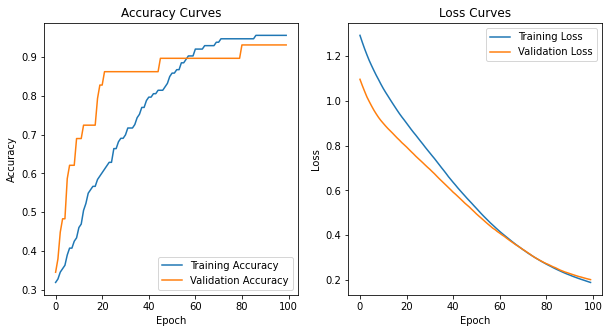

In [79]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [80]:
results = model.evaluate(XTst, yTst)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 6ms/step - loss: 0.3180 - sparse_categorical_accuracy: 0.9444
Test set loss: 0.32, test set accuracy: 94.44%


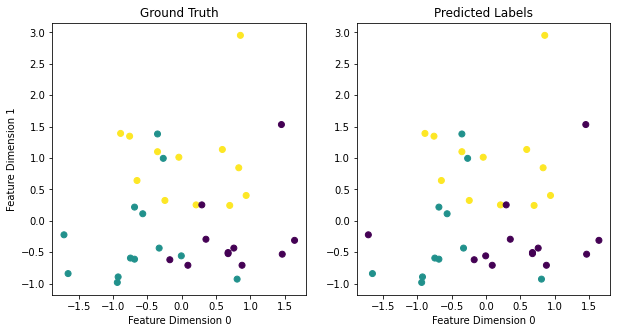

In [81]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(XTst[:,0], XTst[:,1], c=yTst)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(XTst[:,0], XTst[:,1], c=np.argmax(model.predict(XTst), axis=1))
plt.show()

# 4.3 Neural Network for Digit Recognition

Load in MNIST dataset

In [136]:
(x_train, y_train), (x_test, y_test) = tf. keras.datasets.mnist.load_data()

In [137]:
print(f'MNIST sample shape: {x_train.shape[1:]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


### Flatten the data to pass it into a dense network

In [138]:
X_train = np.reshape(x_train, (60000, 784))
X_test = np.reshape(x_test, (10000, 784))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Normalise the data by dividing by 255 - the max value

In [139]:
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

### Create and train a tensorflow fully connected neural network on the training set

In [140]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(X_train)), activation=tf.nn.softmax)])

In [141]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [142]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 1s 686us/step - loss: 3.3523 - sparse_categorical_accuracy: 0.1727 - val_loss: 1.2866 - val_sparse_categorical_accuracy: 0.5237
Epoch 2/100
1500/1500 [==============================] - 1s 621us/step - loss: 1.1439 - sparse_categorical_accuracy: 0.5887 - val_loss: 0.9175 - val_sparse_categorical_accuracy: 0.6745
Epoch 3/100
1500/1500 [==============================] - 1s 620us/step - loss: 0.9152 - sparse_categorical_accuracy: 0.6816 - val_loss: 0.8368 - val_sparse_categorical_accuracy: 0.7117
Epoch 4/100
1500/1500 [==============================] - 1s 621us/step - loss: 0.8595 - sparse_categorical_accuracy: 0.7064 - val_loss: 0.7905 - val_sparse_categorical_accuracy: 0.7309
Epoch 5/100
1500/1500 [==============================] - 1s 622us/step - loss: 0.8213 - sparse_categorical_accuracy: 0.7234 - val_loss: 0.7726 - val_sparse_categorical_accuracy: 0.7418
Epoch 6/100
1500/1500 [==============================] - 1s 623us/step - lo

1500/1500 [==============================] - 1s 619us/step - loss: 0.3841 - sparse_categorical_accuracy: 0.8879 - val_loss: 0.3928 - val_sparse_categorical_accuracy: 0.8834
Epoch 90/100
1500/1500 [==============================] - 1s 620us/step - loss: 0.3856 - sparse_categorical_accuracy: 0.8882 - val_loss: 0.3845 - val_sparse_categorical_accuracy: 0.8862
Epoch 91/100
1500/1500 [==============================] - 1s 621us/step - loss: 0.3819 - sparse_categorical_accuracy: 0.8880 - val_loss: 0.3974 - val_sparse_categorical_accuracy: 0.8809
Epoch 92/100
1500/1500 [==============================] - 1s 623us/step - loss: 0.3869 - sparse_categorical_accuracy: 0.8888 - val_loss: 0.3856 - val_sparse_categorical_accuracy: 0.8866
Epoch 93/100
1500/1500 [==============================] - 1s 622us/step - loss: 0.3749 - sparse_categorical_accuracy: 0.8912 - val_loss: 0.3905 - val_sparse_categorical_accuracy: 0.8823
Epoch 94/100
1500/1500 [==============================] - 1s 621us/step - loss: 0.3

# Predict Test Labels

In [143]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Predict labels for testing set and check accurancy

In [144]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (32, 4)                   3140      
_________________________________________________________________
dense_30 (Dense)             (32, 10)                  50        
_________________________________________________________________
dense_31 (Dense)             (32, 256)                 2816      
Total params: 6,006
Trainable params: 6,006
Non-trainable params: 0
_________________________________________________________________


In [145]:
results = model.evaluate(X_test,y_test)
print(results)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')


#print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

313/313 [==============================] - 0s 684us/step - loss: 0.4156 - sparse_categorical_accuracy: 0.8787
[0.41555121541023254, 0.8787000179290771]
Test set loss: 0.42, test set accuracy: 87.87%


### Plot models training curves

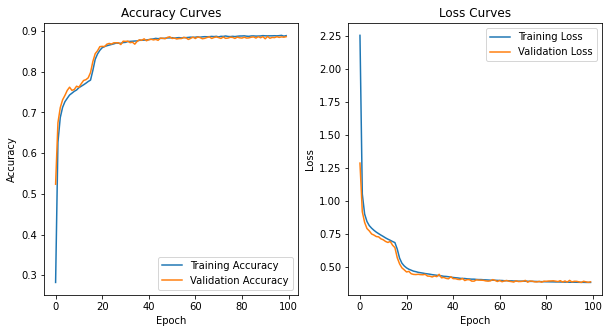

In [149]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Change hyper parameters

# 4.4 Convolutional Neural Network for Digit Recognition

### Load original MNIST dataset
(x_train, y_train), (x_test, y_test)

### Expland the data to include a channel dimension for CNN. As images are greyscale add one additional axis in the last dimension of our data

In [96]:
print(x_train.shape)

(60000, 28, 28)


In [97]:
cnn_train_x = np.expand_dims(x_train, axis=(3))
cnn_test_x = np.expand_dims(x_test, axis=(3))

In [98]:
print(cnn_train_x.shape)

(60000, 28, 28, 1)


### Normalise the data

In [99]:
cnn_train_x = np.divide(cnn_train_x, 255)
cnn_test_x = np.divide(cnn_test_x, 255)

### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [115]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [119]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [122]:
history = model.fit(cnn_train_x, y_train, epochs=10, 
                    validation_data=(cnn_test_x, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3303 - accuracy: 0.9010 - val_loss: 0.0697 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0647 - accuracy: 0.9807 - val_loss: 0.0489 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0461 - accuracy: 0.9867 - val_loss: 0.0414 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0493 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0292 - accuracy: 0.9916 - val_loss: 0.0505 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0222 - accuracy: 0.9940 - val_loss: 0.0404 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0437 - val_ac

###  Predict labels for the testing set and check accuracy

In [123]:
print(model.predict(cnn_test_x))

[[-51.18727   -34.050526  -31.124939  ...  -2.3258615 -32.369713
  -27.926977 ]
 [-56.099495  -48.15673   -18.10606   ... -66.17312   -56.74612
  -64.58733  ]
 [-32.202896   -6.814983  -32.509136  ... -25.374506  -26.861568
  -31.189566 ]
 ...
 [-59.911148  -35.030167  -46.458347  ... -26.89442   -27.397913
  -27.291971 ]
 [-46.68323   -49.042206  -58.339085  ... -50.49774   -30.001335
  -46.455738 ]
 [-46.258045  -52.466156  -45.911167  ... -68.122894  -43.231483
  -56.835575 ]]


### Plot models traing curves 

313/313 - 0s - loss: 0.0609 - accuracy: 0.9861
0.9861000180244446


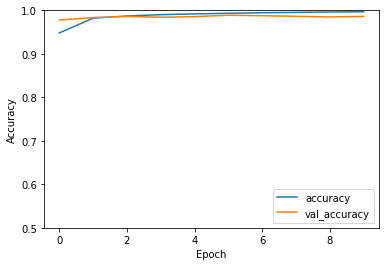

In [125]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(cnn_test_x,  y_test, verbose=2)

print(test_acc)

# Task 4.5

# What makes a neural network a "Deep Learning" Model 

The number of layers of neurons, increasing the number of hidden layers makes the model do more logistic regression functions - as each neuron performas a logisitic regression anaylsis on a different set of parameters, if you complete more hidden layers, more combinations of parameters have been checked for optimality.

# How do I make my neural network deeper? How do I make it wider?

To add depth, add more hidden layers. To add width add more neurons to each layer. Although it is a good idea to have a similar number of neurons in each layer as the number of neurons inputted at the start of the model.

# How do I train my models for longer 

By adding layers and adding neurons.

# Why does running the methods numerous times result in different accuracy values 

Each neuron can be given random starting parameters so there is a stochastic nature to NN.

# What hyperparameters are availbale to our models? What happens when we alter the penalty in the SVM or the optimisation strategy in the neural network? 

We can use different kernels, different degrees, change the number of iterations, gamma (kernel coefficients), probability